In [100]:

import pandas as pd
import numpy as np

df=pd.read_csv("Mental Health Survey (Responses) - Form Responses 1 (2).csv")
gend={"Gender":{"Male":1,"Female":2}}
df=df.replace(gend)
df.head()


,Age,Gender,"Apparent Sadness (Representing despondency, gloom and despair, (more than just ordinary transient low spirits) reflected in-speech, facial expression, and posture. Rate by depth and inability to brighten up.)","Reported sadness (Representing reports of depressed mood, regardless of whether it is reflected in appearance or not. Includes low spirits, despondency or the feeling of being beyond help and without hope. Rate according to intensity, duration and the extent to which the mood is reported to be influenced by events.)","Inner tension (Representing feelings of ill-defined discomfort, edginess, inner turmoil, mental tension mounting to either panic, dread or anguish. Rate according to intensity, frequency, duration and the extent of reassurance called for.)",Reduced sleep (Representing the experience of reduced duration or depth of sleep compared to the subject's own normal pattern when well.),Reduced appetite (Representing the feeling of a loss of appetite compared with when well. Rate by loss of desire for food or the need to force oneself to eat.),"Concentration difficulties (Representing difficulties in collecting one's thoughts mounting to incapacitating lack of concentration. Rate according to intensity, frequency, and degree of incapacity produced.)",Lassitude (Representing a difficulty getting started or slowness initiating and performing everyday activities.),"Inability to feel (Representing the subjective experience of reduced interest in the surroundings, or activities that normally give pleasure. The ability to react with adequate emotion to circumstances or people is reduced.)","Pessimistic thoughts (Representing thoughts of guilt, inferiority, self-reproach, sinfulness, remorse and ruin.)","Suicidal thoughts (Representing the feeling that life is not worth living, that a natural death would be welcome, suicidal thoughts, and preparations for suicide. Suicidal attempts should not in themselves influence the rating.)",Total
0,21,1,3,3,2,1,1,1,1,3,2,2,19
1,21,1,1,1,1,1,1,2,1,1,1,1,11
2,20,1,2,0,0,1,0,4,2,0,2,0,11
3,21,2,0,0,0,0,0,2,0,0,0,0,2
4,20,2,3,0,2,1,2,2,1,1,1,1,14


In [101]:

df.head()


,Age,Gender,"Apparent Sadness (Representing despondency, gloom and despair, (more than just ordinary transient low spirits) reflected in-speech, facial expression, and posture. Rate by depth and inability to brighten up.)","Reported sadness (Representing reports of depressed mood, regardless of whether it is reflected in appearance or not. Includes low spirits, despondency or the feeling of being beyond help and without hope. Rate according to intensity, duration and the extent to which the mood is reported to be influenced by events.)","Inner tension (Representing feelings of ill-defined discomfort, edginess, inner turmoil, mental tension mounting to either panic, dread or anguish. Rate according to intensity, frequency, duration and the extent of reassurance called for.)",Reduced sleep (Representing the experience of reduced duration or depth of sleep compared to the subject's own normal pattern when well.),Reduced appetite (Representing the feeling of a loss of appetite compared with when well. Rate by loss of desire for food or the need to force oneself to eat.),"Concentration difficulties (Representing difficulties in collecting one's thoughts mounting to incapacitating lack of concentration. Rate according to intensity, frequency, and degree of incapacity produced.)",Lassitude (Representing a difficulty getting started or slowness initiating and performing everyday activities.),"Inability to feel (Representing the subjective experience of reduced interest in the surroundings, or activities that normally give pleasure. The ability to react with adequate emotion to circumstances or people is reduced.)","Pessimistic thoughts (Representing thoughts of guilt, inferiority, self-reproach, sinfulness, remorse and ruin.)","Suicidal thoughts (Representing the feeling that life is not worth living, that a natural death would be welcome, suicidal thoughts, and preparations for suicide. Suicidal attempts should not in themselves influence the rating.)",Total
0,21,1,3,3,2,1,1,1,1,3,2,2,19
1,21,1,1,1,1,1,1,2,1,1,1,1,11
2,20,1,2,0,0,1,0,4,2,0,2,0,11
3,21,2,0,0,0,0,0,2,0,0,0,0,2
4,20,2,3,0,2,1,2,2,1,1,1,1,14


In [102]:

y=df.drop(df.columns[[0,1]],axis=1)
y.head()


,"Apparent Sadness (Representing despondency, gloom and despair, (more than just ordinary transient low spirits) reflected in-speech, facial expression, and posture. Rate by depth and inability to brighten up.)","Reported sadness (Representing reports of depressed mood, regardless of whether it is reflected in appearance or not. Includes low spirits, despondency or the feeling of being beyond help and without hope. Rate according to intensity, duration and the extent to which the mood is reported to be influenced by events.)","Inner tension (Representing feelings of ill-defined discomfort, edginess, inner turmoil, mental tension mounting to either panic, dread or anguish. Rate according to intensity, frequency, duration and the extent of reassurance called for.)",Reduced sleep (Representing the experience of reduced duration or depth of sleep compared to the subject's own normal pattern when well.),Reduced appetite (Representing the feeling of a loss of appetite compared with when well. Rate by loss of desire for food or the need to force oneself to eat.),"Concentration difficulties (Representing difficulties in collecting one's thoughts mounting to incapacitating lack of concentration. Rate according to intensity, frequency, and degree of incapacity produced.)",Lassitude (Representing a difficulty getting started or slowness initiating and performing everyday activities.),"Inability to feel (Representing the subjective experience of reduced interest in the surroundings, or activities that normally give pleasure. The ability to react with adequate emotion to circumstances or people is reduced.)","Pessimistic thoughts (Representing thoughts of guilt, inferiority, self-reproach, sinfulness, remorse and ruin.)","Suicidal thoughts (Representing the feeling that life is not worth living, that a natural death would be welcome, suicidal thoughts, and preparations for suicide. Suicidal attempts should not in themselves influence the rating.)",Total
0,3,3,2,1,1,1,1,3,2,2,19
1,1,1,1,1,1,2,1,1,1,1,11
2,2,0,0,1,0,4,2,0,2,0,11
3,0,0,0,0,0,2,0,0,0,0,2
4,3,0,2,1,2,2,1,1,1,1,14


In [103]:

X=df.drop(df.columns[[2,3,4,5,6,7,8,9,10,11,12]],axis=1)
X.head()


,Age,Gender
0,21,1
1,21,1
2,20,1
3,21,2
4,20,2


In [104]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [105]:

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(179, 2) (45, 2) (179, 11) (45, 11)


In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_percentage_error
model = LinearRegression()
wrapper = MultiOutputRegressor(model)
model.fit(X_train, y_train)
predictions1 = model.predict(X_test)
mean_absolute_percentage_error(y_test, predictions1) 

2614059371473343.0

In [107]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
model = KNeighborsRegressor()
model.fit(X_train, y_train)
predictions3 = model.predict(X_test)
mean_absolute_percentage_error(y_test, predictions3)

2629374327899138.5

In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
model =DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions4 = model.predict(X_test)
mean_absolute_percentage_error(y_test, predictions4)

2383531223603254.0

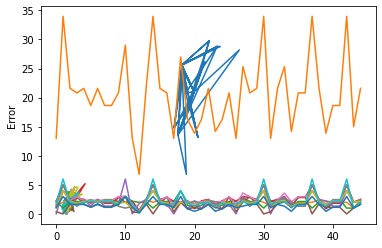

In [109]:

import matplotlib.pyplot as plt
plt.plot(predictions1,predictions3,predictions4)
plt.ylabel("Error")
plt.show()


In [110]:
from sklearn.svm import LinearSVR
model = LinearSVR()
wrapper = MultiOutputRegressor(model)
wrapper.fit(X_train, y_train)
predictions2=wrapper.predict(X_test)
mean_absolute_percentage_error(y_test, predictions2)

/home/shivam/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/shivam/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/shivam/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/shivam/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/shivam/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number o

2746723858870078.0